In [1]:
import pandas as pd
import numpy as np

from collections import Counter
import time
import re
import matplotlib.pyplot as plt

from datetime import datetime, timezone

In [2]:
corpus = pd.read_csv('zhumysbar.csv')

In [3]:
corpus.shape

(25, 6)

In [5]:
corpus.head(2)

,id,text,mes_date,views,mes_title,mes_description
0,35,Компания SoftTtchSolutions находится в поиске ...,2020-11-23 12:45:10+00:00,314.0,None,None
1,34,⚡️Вакансия: Backend разработчик \nг. Алматы\n📍...,2020-11-20 09:29:08+00:00,471.0,None,None


In [6]:
corpus.mes_date = pd.to_datetime(corpus.mes_date)
corpus = corpus[['id', 'text', 'mes_date', 'views', 'mes_title', 'mes_description']]
corpus.text = corpus.text.fillna('').astype(str)

def remove_links_and_quotes(text):
    try:
        return ' '.join([word for word in text.split() if 'http' not in word and '@' not in word])
    except:
        pass
corpus.text = corpus.text.apply(lambda x: remove_links_and_quotes(x))
corpus.mes_title = corpus.mes_title.apply(lambda x: remove_links_and_quotes(x))
corpus.mes_description = corpus.mes_description.apply(lambda x: remove_links_and_quotes(x))
corpus.fillna('', inplace=True)

corpus = corpus[corpus.text.apply(lambda x: len(x) > 0)]
corpus.text = corpus.text.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.mes_title = corpus.mes_title.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.mes_description = corpus.mes_description.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.sort_values('mes_date', inplace=True, ascending=True)

corpus.head(10)

,id,text,mes_date,views,mes_title,mes_description
23,5,вакансия java developer middle senior что нео...,2020-08-25 06:17:50+00:00,541,none,none
22,6,вакансия golang либо scala разработчик middle...,2020-08-25 06:18:29+00:00,605,none,none
21,7,вакансия fico developer senior middle что нео...,2020-08-25 06:18:53+00:00,684,none,none
20,8,вакансия data scientist middle направление ан...,2020-08-25 06:19:13+00:00,780,none,none
19,9,вакансия data scientist junior middle направл...,2020-08-26 04:45:26+00:00,815,none,none
18,10,вакансия etl developer алматы и нур султан mi...,2020-09-11 07:06:21+00:00,679,none,none
17,11,вакансия bi разработчик аналитик алматы и нур...,2020-09-21 05:29:21+00:00,667,none,none
16,12,вакансия data scientist junior направление ав...,2020-09-21 08:03:40+00:00,799,none,none
15,13,вакансия data scientist middle направление ha...,2020-09-23 06:44:54+00:00,816,none,none
14,14,вакансия data scientist в направлении маркети...,2020-10-05 15:08:25+00:00,873,none,none


In [7]:
corpus.tail(10)

,id,text,mes_date,views,mes_title,mes_description
10,18,вакансия backend разработчик node js г алматы...,2020-11-04 12:03:42+00:00,767,none,none
9,26,middle senior android разработчик almanit алма...,2020-11-05 06:04:41+00:00,651,none,none
8,27,дб ао сбербанк сбер набираю в команду крутых t...,2020-11-05 07:28:22+00:00,760,none,none
7,28,для бесплатного размещения вакансий прошу писа...,2020-11-12 06:02:00+00:00,463,none,none
5,30,mobile qa компания prime source город алматы ...,2020-11-12 06:20:09+00:00,473,none,none
4,31,алматы businessanalyst бизнес аналитик компан...,2020-11-12 06:20:44+00:00,562,none,none
3,32,главный специалист инфраструктура и сервисы ит...,2020-11-13 07:06:11+00:00,687,none,none
2,33,вакансия аналитик данных qlik г алматы компан...,2020-11-17 05:19:14+00:00,614,none,none
1,34,вакансия backend разработчик г алматы компани...,2020-11-20 09:29:08+00:00,471,none,none
0,35,компания softttchsolutions находится в поиске ...,2020-11-23 12:45:10+00:00,314,none,none


In [8]:
corpus.to_csv('Analysts_preproc.csv', index=None)

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def tokenize_me(file_text):
    #firstly let's apply nltk tokenization
    tokens = nltk.word_tokenize(file_text)

    #drop stop_words
    stop_words = stopwords.words('russian')
    stop_words.extend(['вакансия','алматы','что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'за', 'было','требуемые','навыки','ищет', 
                       'специалиста', 'компания', 'откликаться', 'geekjob','описание','вакансии','kz','её','пост','астана',
                       'нурсултан','личку','подробнее', 'опыт', 'работы', 'знания', 'умение', 'middle', 'junior', 'senior', 'необходимо', 'уметь',
                       'высылать', 'узнавать', 'работать', 'jysan', 'требования', 'график', 'возможность', 'уровень', 'ит', 'проблем',
                       'компании', 'задачи', 'позиции', 'наименование', 'вилка', 'соискатель', 'заниматься', 'писать', 'разработки', 'основ',
                       'понимание', '000', '00', 'новых', 'требования', 'обязанности', 'кода', 'банк', 'тг','предстоит', 'делать', 'знание',
                      'cv','подробности','года','знать','контакты','условия','написания'])
    
    
    stop_words.extend(stopwords.words('english'))
    tokens = [i for i in tokens if ( i not in stop_words )]
    
    #cleaning words
    tokens = [i.replace("«", "").replace("»", "") for i in tokens]

    return ' '.join(tokens)

corpus.text = corpus.text.apply(lambda x: tokenize_me(x))
corpus.head(10)

corpus.to_csv('Analysts_tokens.csv', index=None)

[nltk_data] Downloading package punkt to /home/renat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/renat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
from wordcloud import WordCloud

In [39]:
corpus.head(2)

,id,text,mes_date,views,mes_title,mes_description
23,5,java developer шаблонов проектирования принцип...,2020-08-25 06:17:50+00:00,541,none,none
22,6,golang либо scala разработчик понимания принци...,2020-08-25 06:18:29+00:00,605,none,none


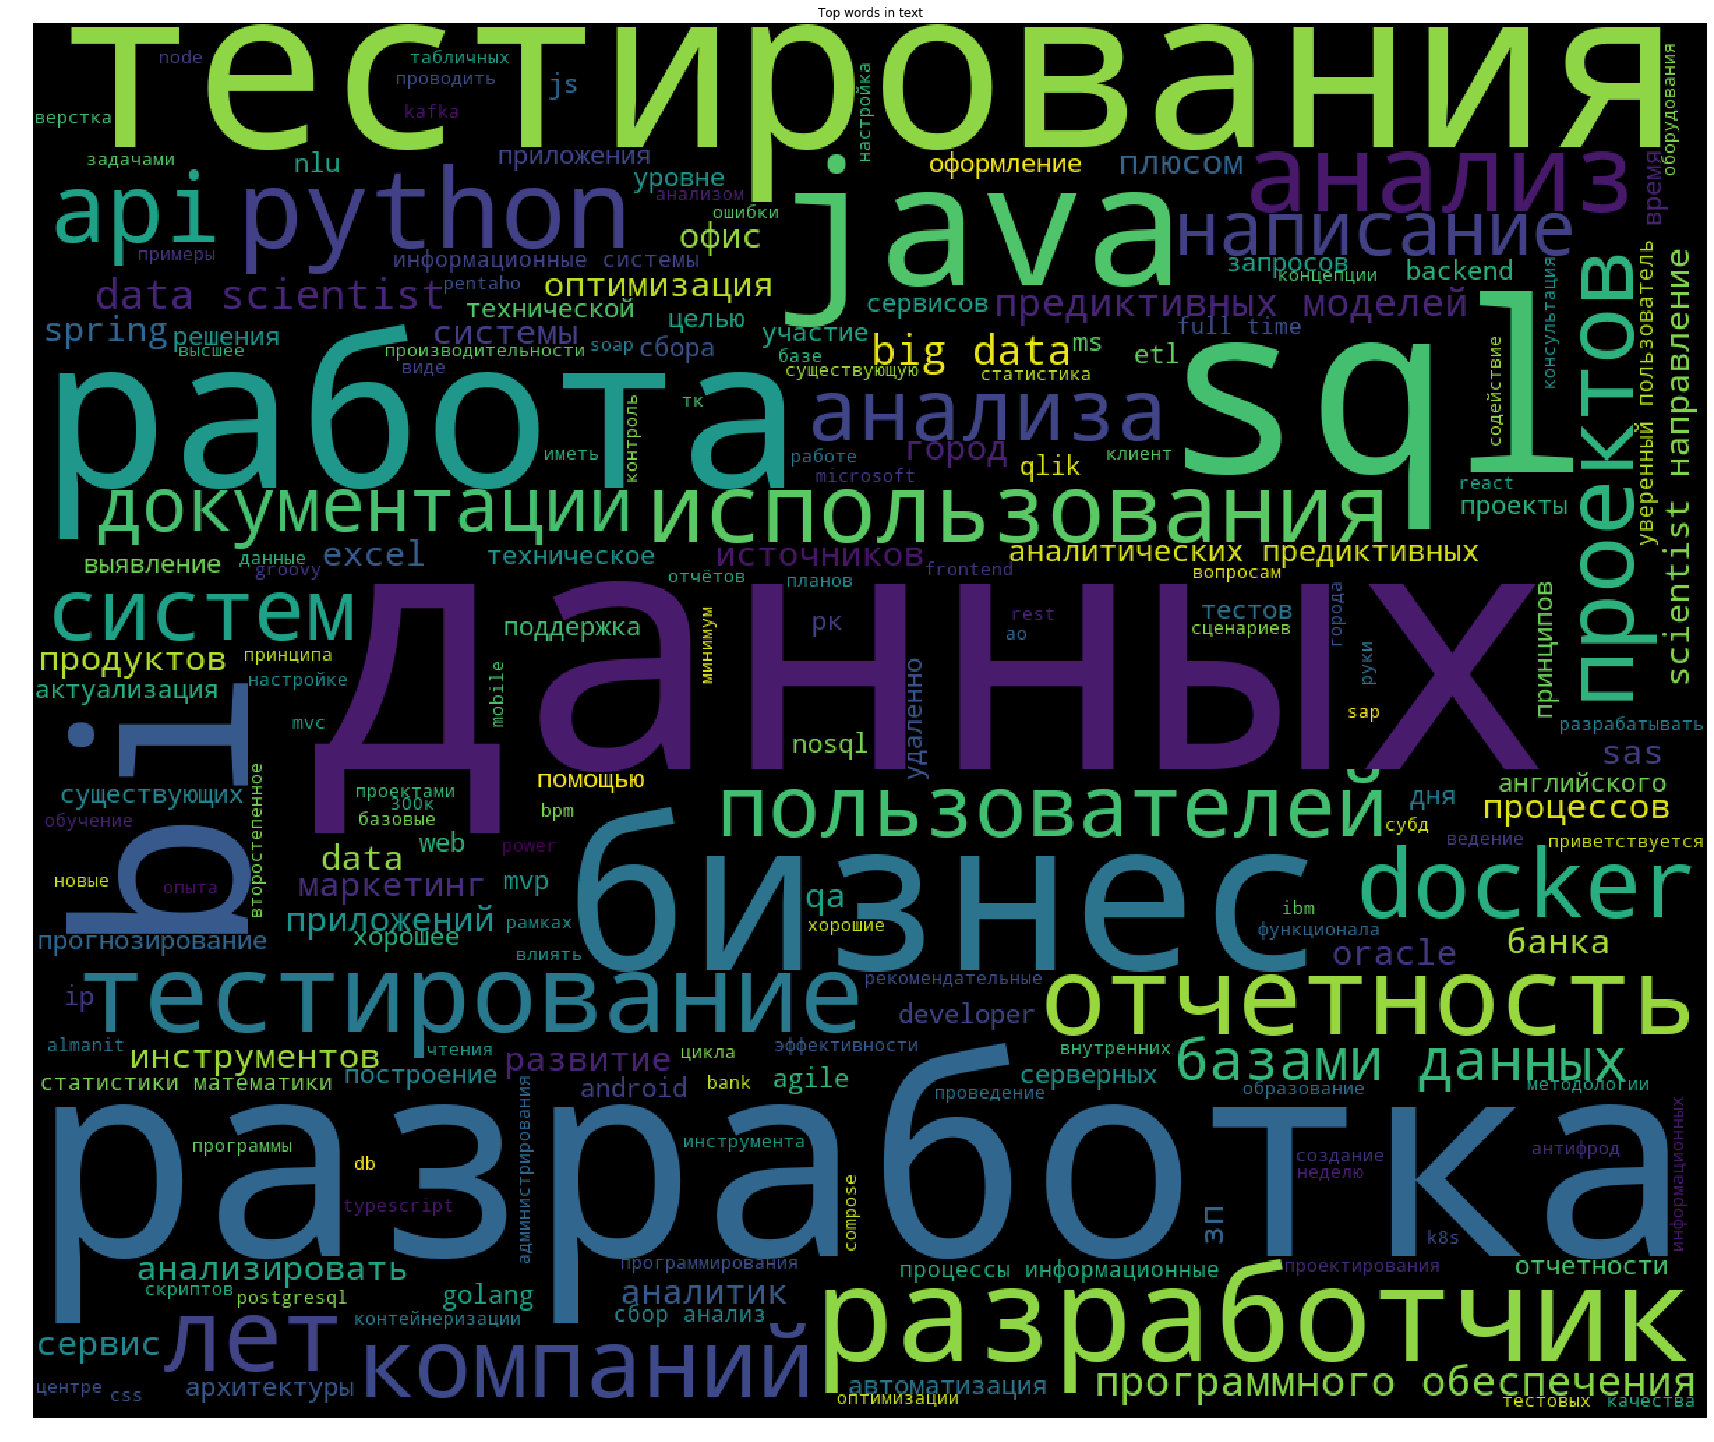

In [40]:
text = ' '.join(corpus['text'])
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud)
plt.title('Top words in text')
plt.axis("off")
plt.show()

In [41]:
corpus.text

23    java developer шаблонов проектирования принцип...
22    golang либо scala разработчик понимания принци...
21    fico developer высшее техническое образование ...
20    data scientist направление антифрод выявление ...
19    data scientist направление речевая аналитика p...
18    etl developer нур султан sql скрипты любой сло...
17    bi разработчик аналитик нур султан анализирова...
16    data scientist направление авто маркетинг увер...
15    data scientist направление hard collection опт...
14    data scientist направлении маркетинг рекоменда...
13    frontend разработчик г 2х лет уверенное react ...
12    аналитик data science направление маркетинг ре...
11    frontend разработчик г startup легкий удобный ...
10    backend разработчик node js г startup легкий у...
9     android разработчик almanit 500 000тг руки 700...
8     дб ао сбербанк сбер набираю команду крутых tes...
7     бесплатного размещения вакансий прошу должно в...
5     mobile qa prime source город зп 200к full 

In [42]:
corpus.groupby('mes_title')['text'].count().sort_values(ascending=False).head(20)

mes_title
none    23
Name: text, dtype: int64

In [43]:
total_history = corpus['mes_date'].dt.date.sort_values()

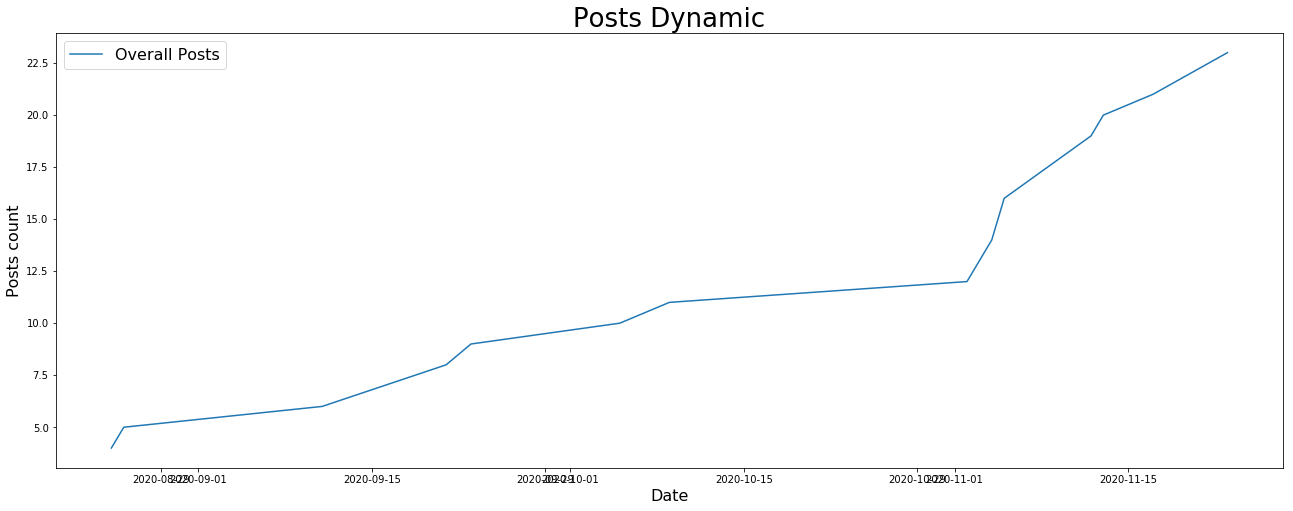

In [44]:
%matplotlib inline
import matplotlib.pylab as plt
plt.title('Posts Dynamic', fontsize=26)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Posts count', fontsize=16)
total_history.value_counts().sort_index().cumsum().plot(figsize=(22,8), label='Overall Posts')
plt.legend(fontsize=16)
plt.savefig('allposts.png', fps=150)

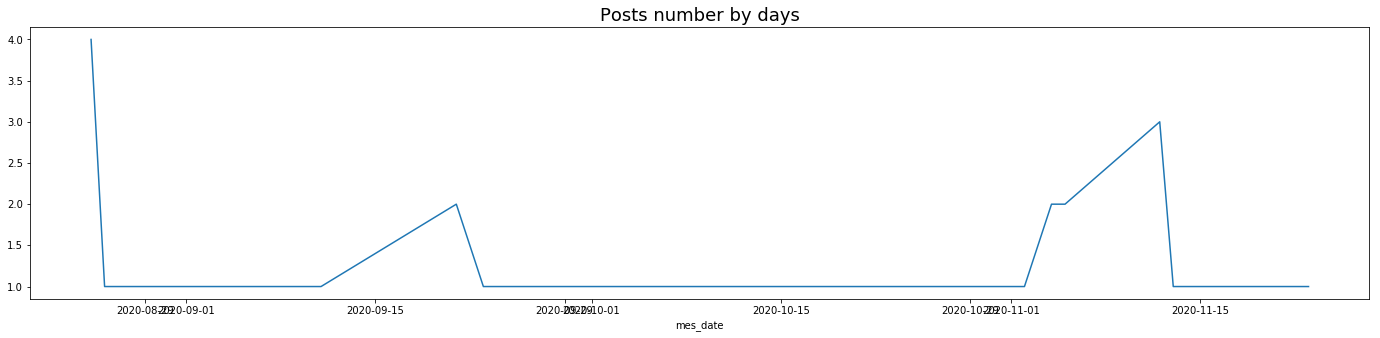

In [45]:
import matplotlib.pylab as plt
%matplotlib inline

corpus.groupby(corpus.mes_date.dt.date).count().mes_date.plot(figsize=(24,5))
plt.title('Posts number by days', fontsize=18)
plt.savefig('by date.png', fps=400)

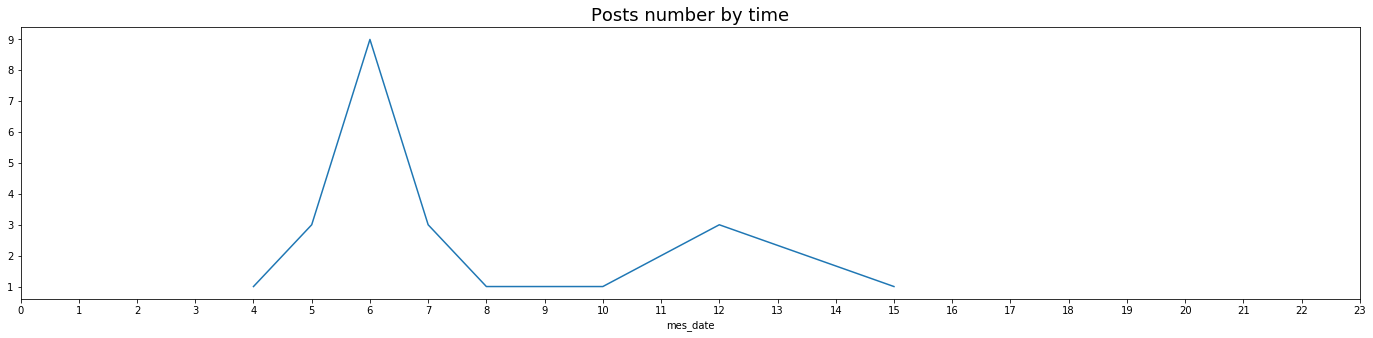

In [46]:
#corpus.groupby(corpus.mes_date.dt.hour).count().mes_date.plot(figsize=(24,5))
corpus.groupby(corpus.mes_date.dt.hour).count().mes_date.plot(figsize=(24,5))

plt.title('Posts number by time', fontsize=18)
plt.xticks(range(24))
plt.savefig('by hours.png', fps=400)
plt.show()

In [47]:
total_views = pd.pivot_table(corpus, values = 'views', columns=['mes_date'], aggfunc=np.sum).T
#total_views = total_views.reset_index(drop=True)['mes_date'].dt.date.sort_values()
#total_views.head(2)

In [48]:
total_views = total_views.reset_index()
total_views.head(2)

,mes_date,views
0,2020-08-25 06:17:50+00:00,541.0
1,2020-08-25 06:18:29+00:00,605.0


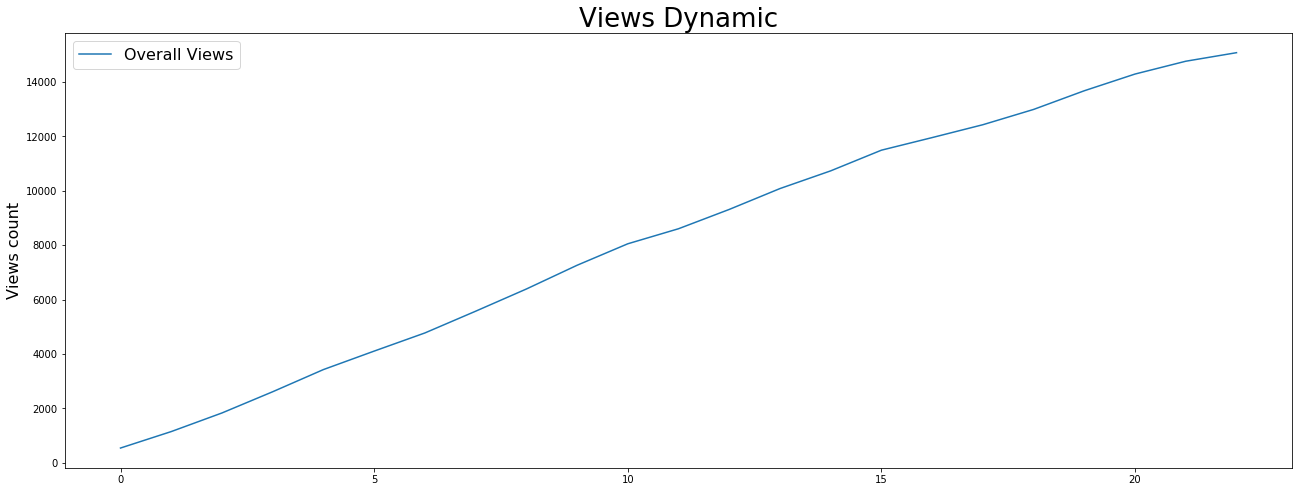

In [49]:
%matplotlib inline
import matplotlib.pylab as plt
plt.title('Views Dynamic', fontsize=26)
plt.ylabel('Views count', fontsize=16)
total_views.views.cumsum().plot(figsize=(22,8), label='Overall Views')
plt.legend(fontsize=16)
plt.savefig('allViews.png', fps=150)

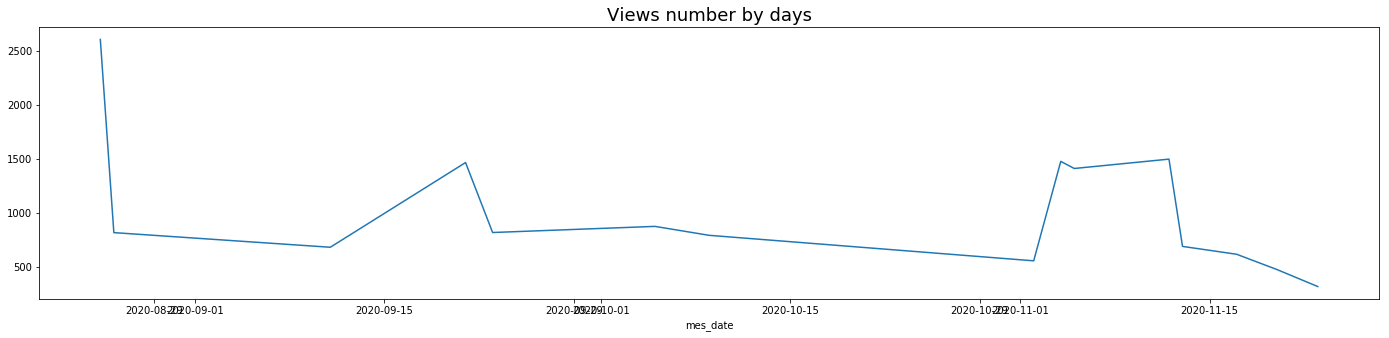

In [50]:
import matplotlib.pylab as plt
%matplotlib inline

total_views.groupby(total_views.mes_date.dt.date).views.sum().plot(figsize=(24,5))
plt.title('Views number by days', fontsize=18)
plt.savefig('views by date.png', fps=400)

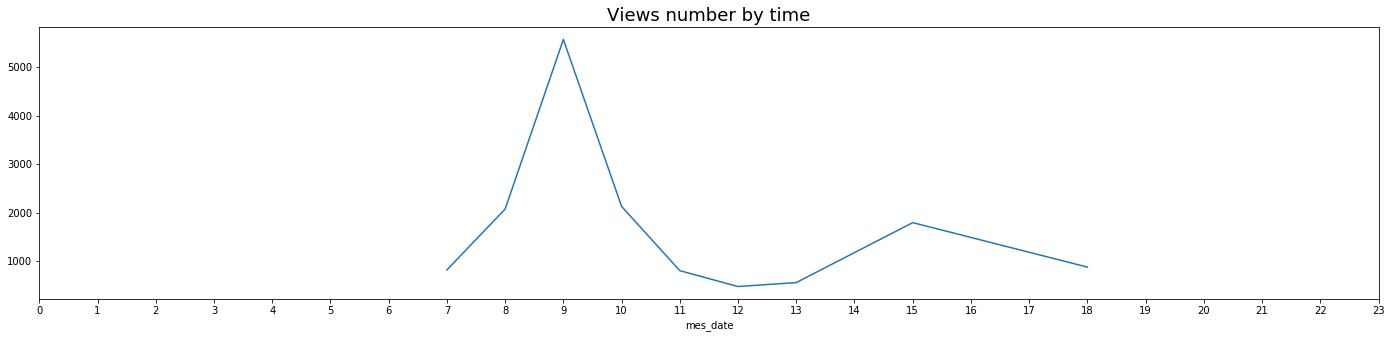

In [51]:
#total_views.groupby(total_views.mes_date.dt.hour).views.sum().plot(figsize=(24,5))
total_views.groupby(total_views.mes_date.dt.tz_convert('Europe/Moscow').dt.hour).views.sum().plot(figsize=(24,5))
plt.title('Views number by time', fontsize=18)
plt.xticks(range(24))
plt.savefig('Views by hours Moscow.png', fps=400)
plt.show()

In [52]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time

def get_words_by_threshold_report(text_series, min_df=0.02, max_df=0.75):
    vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)

    counts = vectorizer.fit_transform(text_series)
    corpus_id2word = {value: key for key, value in vectorizer.vocabulary_.items()}

    print('Words in dictionary: {}\n'.format(counts.shape[1]))
    print('Dictionary before threshold filtration: ', Counter(' '.join(text_series.values).split()).most_common(20), '\n')

    print('Words under top threshold:   ', [corpus_id2word[elem] for elem in np.argsort(np.array(counts.sum(axis=0)).ravel())[-40:][::-1]])
    print()
    print('Words upper bottom threshold:', [corpus_id2word[elem] for elem in np.argsort(np.array(counts.sum(axis=0)).ravel())[:20]])
    return counts, vectorizer, corpus_id2word

def get_lda_model(counts, corpus_id2word, num_topics=10, alpha_value=0.1, var_iter=50, passes=50):
    gensim_corpus = gensim.matutils.Scipy2Corpus(counts)
    t_start = time.time()
    lda = gensim.models.LdaModel(
        corpus=gensim_corpus,
        passes=passes,
        num_topics=num_topics,
        alpha=[alpha_value] * num_topics,
        iterations=var_iter,
        id2word=corpus_id2word,
        eval_every=0,
        random_state=42
    )
    current_score = lda.bound(gensim_corpus)
    time_ellapsed = int(time.time() - t_start)

    print('ELBO = {1:.4f}, time: {2} seconds'.format(
        alpha_value, current_score, time_ellapsed))
    
    gamma, _ = lda.inference(gensim_corpus)
    gamma = gamma / gamma.sum(1).reshape(-1, 1)
    
    return lda, gamma

def build_topic_words_report(lda, top_words_num=25, topic_names=None):
    if topic_names==None:
        topic_names = [''] * lda.num_topics
    topic_space = max(map(len, topic_names)) + 2
    
    if topic_space==2:
        for topic_index in range(lda.num_topics):
            print('{0} topic: {1}'.format(
                topic_index, ', '.join(list(zip(*lda.show_topic(topic_index, topn=top_words_num)))[0])))
        return
    
    for topic_index in range(lda.num_topics):
        print('{0} topic :{1: ^{2}}: {3}'.format(
            topic_index, topic_names[topic_index], topic_space,
            ', '.join(list(zip(*lda.show_topic(topic_index, topn=top_words_num)))[0])))
        
def build_topic_subjects_report(lda, gamma, text_series, topic_names=None):
    if topic_names==None:
        topic_names = [''] * lda.num_topics
    for topic_index in range(lda.num_topics):
        print('Topic {0} - {1}'.format(topic_index, topic_names[topic_index]))
        best_doc_indexes = gamma[:, topic_index].argsort()[-10:][::-1]
        
        subjects_with_proba = []
        for person_count, doc in enumerate(best_doc_indexes):
            if gamma[doc, topic_index] > 0.01 or person_count<3:
                subjects_with_proba.append('{0} - {1:.1%}'.format(text_series.index[doc], gamma[doc, topic_index]))
        print(', '.join(subjects_with_proba), '\n')

In [53]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.05, max_df=0.85)

Words in dictionary: 257

Dictionary before threshold filtration:  [('данных', 21), ('data', 14), ('разработка', 14), ('sql', 10), ('bi', 10), ('1', 10), ('тестирования', 9), ('анализ', 9), ('работа', 8), ('бизнес', 8), ('java', 7), ('разработчик', 7), ('системы', 7), ('тестирование', 6), ('2', 6), ('т', 6), ('python', 6), ('отчетность', 6), ('лет', 5), ('базами', 5)] 

Words under top threshold:    ['данных', 'разработка', 'data', 'sql', 'bi', 'тестирования', 'анализ', 'бизнес', 'работа', 'разработчик', 'java', 'системы', 'python', 'тестирование', 'отчетность', 'лет', 'систем', 'scientist', 'анализа', 'моделей', 'написание', 'docker', 'направление', 'обеспечения', 'api', 'предиктивных', 'программного', 'документации', 'пользователей', 'аналитических', 'использования', 'проектов', 'базами', 'компаний', 'big', 'qa', 'плюсом', 'развитие', 'офис', 'продуктов']

Words upper bottom threshold: ['которое', 'минимум', 'наличие', 'настройка', 'неделю', 'ниже', 'новые', 'нур', 'образование', 'об

In [54]:
lda_norm, gamma_norm = get_lda_model(counts, corpus_id2word, num_topics=5)

ELBO = -4314.3205, time: 0 seconds


In [55]:
build_topic_words_report(lda_norm, top_words_num=15)

0 topic: разработка, данных, docker, тестирование, java, обеспечения, программного, базами, банка, работа, лет, golang, существующих, nosql, принципов
1 topic: data, sql, анализ, данных, scientist, направление, предиктивных, моделей, аналитических, big, бизнес, python, sas, статистики, excel
2 topic: bi, данных, компаний, пользователей, анализировать, источников, бизнес, отчетность, системы, систем, процессы, информационные, etl, ms, sql
3 topic: тестирования, разработка, приложений, продуктов, qa, актуализация, зп, java, работа, time, full, поддержка, серверных, развитие, api
4 topic: сервис, документации, написание, js, разработчик, рк, сервисов, backend, уровне, удаленно, 10, английского, дня, 200, время


In [65]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.025, max_df=0.45)
lda_norm_45, gamma_norm_45 = get_lda_model(counts, corpus_id2word, num_topics=5)

Words in dictionary: 910

Dictionary before threshold filtration:  [('данных', 21), ('data', 14), ('разработка', 14), ('sql', 10), ('bi', 10), ('1', 10), ('тестирования', 9), ('анализ', 9), ('работа', 8), ('бизнес', 8), ('java', 7), ('разработчик', 7), ('системы', 7), ('тестирование', 6), ('2', 6), ('т', 6), ('python', 6), ('отчетность', 6), ('лет', 5), ('базами', 5)] 

Words under top threshold:    ['данных', 'data', 'bi', 'sql', 'тестирования', 'анализ', 'бизнес', 'работа', 'java', 'системы', 'разработчик', 'тестирование', 'python', 'отчетность', 'написание', 'аналитических', 'обеспечения', 'big', 'использования', 'анализа', 'пользователей', 'docker', 'моделей', 'базами', 'scientist', 'компаний', 'предиктивных', 'лет', 'систем', 'программного', 'направление', 'проектов', 'api', 'документации', 'приложений', 'статистики', 'инструментов', 'аналитик', 'процессы', 'маркетинг']

Words upper bottom threshold: ['000тг', 'оргтехники', 'основании', 'основная', 'особенностей', 'ответственного'

In [71]:
build_topic_words_report(
    lda_norm_45, top_words_num=10,
    topic_names=['тестирование/QA', 'Data Analytic/ Data Scientist', 'Mobile Dev', 'Enterprise', 'Разработчик БД analyst'] * 5)

0 topic :        тестирование/QA        : тестирования, анализ, qa, систем, приложений, банка, актуализация, продуктов, зп, пользователей
1 topic : Data Analytic/ Data Scientist : данных, bi, data, аналитических, предиктивных, моделей, отчетность, sql, big, системы
2 topic :          Mobile Dev           : android, разработчик, 500, развитие, almanit, руки, java, bank, api, функционала
3 topic :          Enterprise           : бизнес, spring, программного, обеспечения, java, работа, использования, техническое, лет, docker
4 topic :    Разработчик БД analyst     : данных, сервис, разработчик, базами, документации, написание, sql, data, docker, golang


In [72]:
def weekpair_2date(pair):
    atime = time.strptime('{} {} 1'.format(*pair.split('-')), '%Y %W %w')
    return pd.to_datetime('{0}-{1}-{2}'.format(atime.tm_year, atime.tm_mon, atime.tm_mday))

topic_dynamic = pd.DataFrame(week_text_filter)
#topic_dynamic['topic'] = np.argmax(gamma_norm_45, axis=1)
topic_dynamic['post_count'] = week_text.apply(len)
topic_dynamic['date'] = list(map(weekpair_2date, topic_dynamic.index))
topic_dynamic.sort_values('date', inplace=True)
topic_dynamic.head()

,text,post_count,date
mes_date,,,
2020-35,java developer шаблонов проектирования принцип...,2268,2020-08-31
2020-37,etl developer нур султан sql скрипты любой сло...,851,2020-09-14
2020-39,bi разработчик аналитик нур султан анализирова...,1499,2020-09-28
2020-41,data scientist направлении маркетинг рекоменда...,447,2020-10-12
2020-45,аналитик data science направление маркетинг ре...,2913,2020-11-09


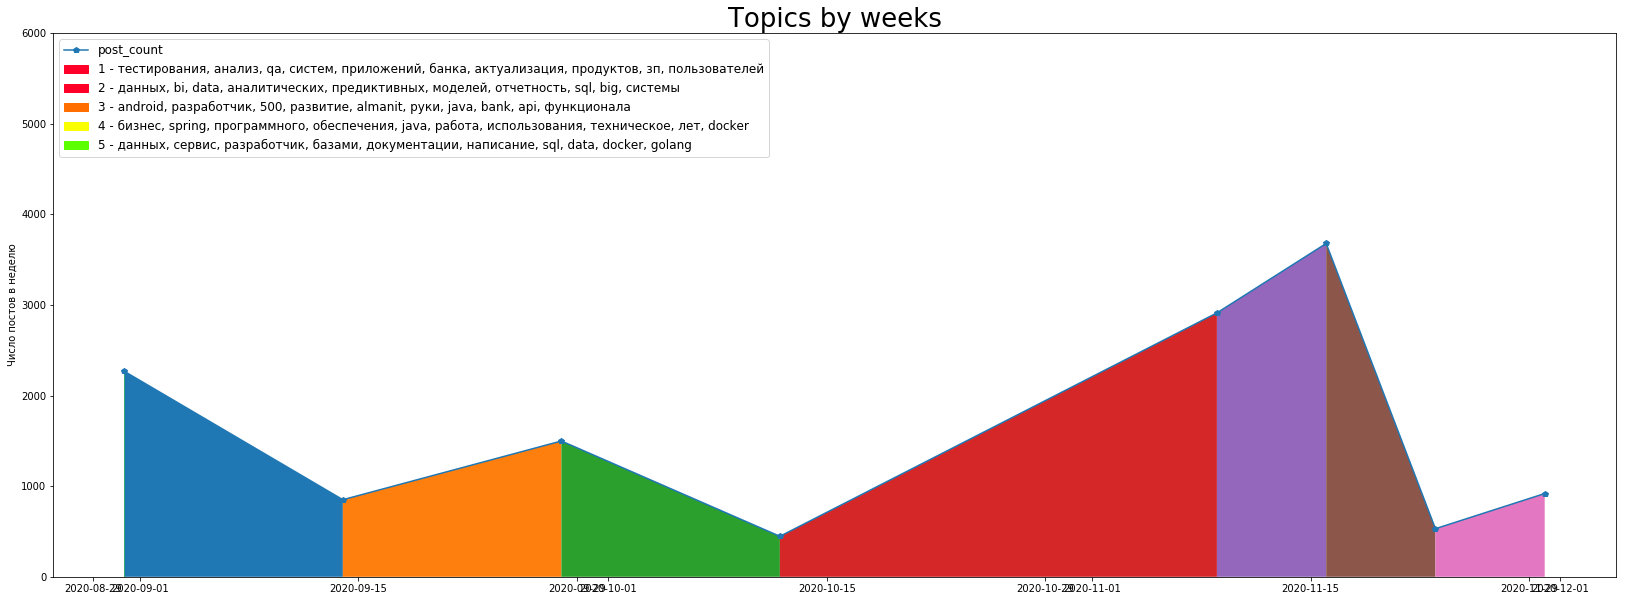

In [73]:
import matplotlib as mpl
cmap = mpl.cm.gist_rainbow
normalize = mpl.colors.Normalize(vmin=1, vmax=10)
cmap(normalize(3))

plt.figure(figsize=(28,10))
plt.plot(topic_dynamic.date, topic_dynamic.post_count, '-p')

for topic_index in range(lda_norm_45.num_topics):
    plt.fill_between(
        y1=0, y2=topic_dynamic.post_count[:1], 
        x=topic_dynamic.date.values[:1], 
        color=cmap(normalize(topic_index)),
        label = '{0} - {1}'.format(topic_index + 1, ', '.join(list(zip(*lda_norm_45.show_topic(topic_index, topn=10)))[0]))
    )
for step in range(topic_dynamic.shape[0]):
    plt.fill_between(
        y1=0, y2=topic_dynamic.post_count[step: step+2], 
        x=topic_dynamic.date.values[step: step+2], 
        #color=cmap(normalize(topic_dynamic.topic.iloc[step])),
    )

plt.ylim(0, 6000)
plt.legend(fontsize=12, loc='upper left')
plt.ylabel('Число постов в неделю')
plt.title('Topics by weeks', fontsize=26)
plt.savefig('topic_history.png')
plt.show()

In [74]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,make_scorer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import os
import scikitplot as skplt
import seaborn as sns
import time

/home/renat/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/renat/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/renat/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [75]:
def plot_top_ngrams(text,ngrams=(1,1),top=10,max_features=100,color='rgba(0,255,255,0.5)'):
    cv=CountVectorizer(ngram_range=ngrams,max_features=max_features)
    trans_text=cv.fit_transform(text)
    col_sum=trans_text.sum(axis=0)
    word_index=[(word,col_sum[0,idx]) for word,idx in cv.vocabulary_.items()]
    sorted_word_index=sorted(word_index,key=lambda x:x[1],reverse=True)
    top_words_index=sorted_word_index[:top]
    top_words=[element[0] for element in top_words_index]
    counts=[element[1] for element in top_words_index]
    df = pd.DataFrame(zip(top_words,counts))
    df.columns = ['top_words', 'counts']
    df.set_index('top_words', inplace=True)
    df.sort_values('counts', ascending=False)
    df.plot(y='counts', kind='bar', legend=False)

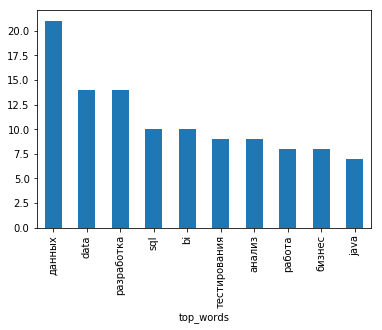

In [76]:
plot_top_ngrams(corpus.text,ngrams=(1,1),top=10,color='rgba(128,0,0,0.5)')

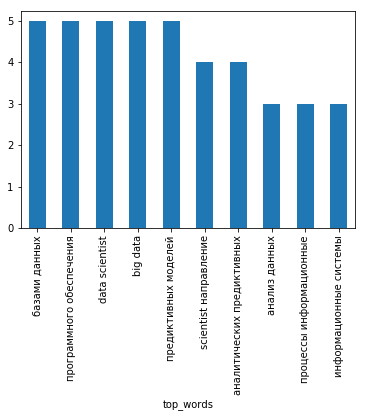

In [77]:
plot_top_ngrams(corpus.text,ngrams=(2,2),top=10,color='rgba(128,0,0,0.5)')

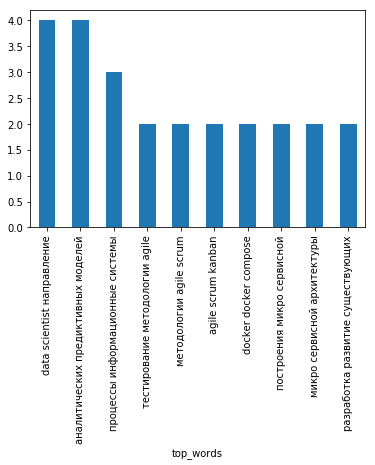

In [78]:
plot_top_ngrams(corpus.text,ngrams=(3,3),top=10,color='rgba(128,128,128,0.5)')

In [79]:
X = corpus.text

In [80]:
cv = CountVectorizer(ngram_range=(1,2), analyzer='word')
train_X_cv = cv.fit_transform(X.values)

In [81]:
tsvd = TruncatedSVD(n_components=50, random_state=42)
train_X_svd = tsvd.fit_transform(train_X_cv)
tsne = TSNE(n_components=2, random_state=42)
train_X_tsne = tsne.fit_transform(train_X_svd)

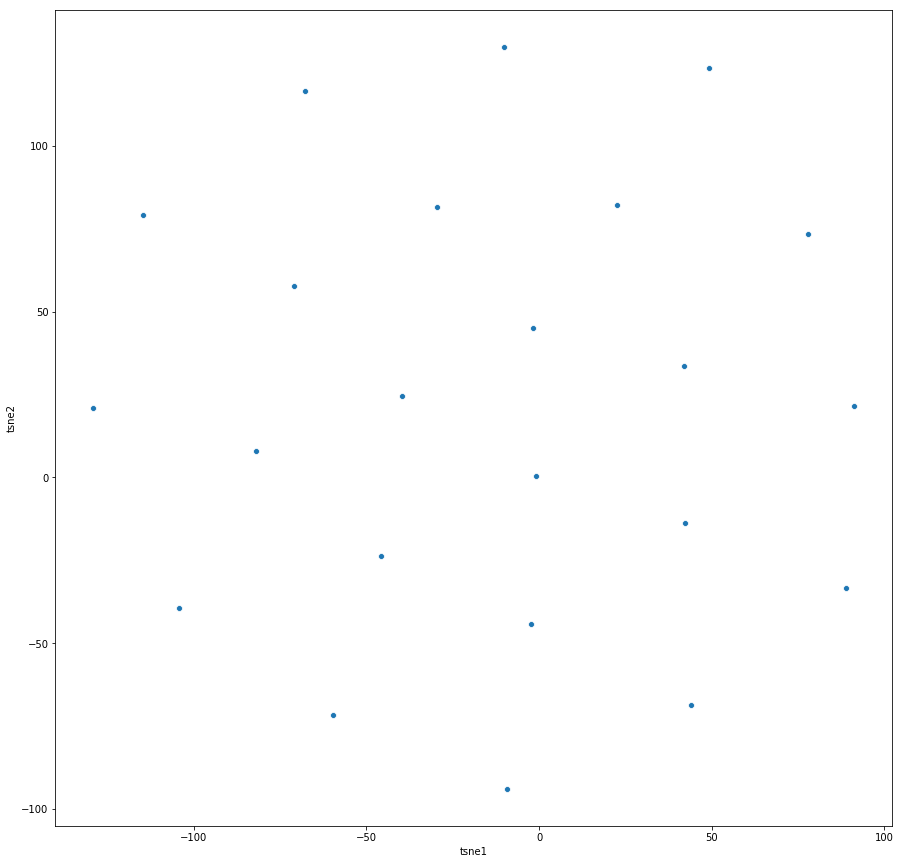

In [82]:
df = pd.DataFrame()
df["tsne1"] = pd.Series(train_X_tsne[:, 0])
df["tsne2"] = pd.Series(train_X_tsne[:, 1])
plt.figure(figsize=(15, 15))
sns.scatterplot(
    df["tsne1"], df["tsne2"], data=df
)
plt.show()